###### In this notebook, we will analyze Netflix data and extract some ideas that will help us make a decision.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [4]:
df=pd.read_csv('D:\project\Investigating Netflix Movies and Guest Stars in The Office (project)/netflix_titles.csv')
#Going through the data and identifying the specific task, I decided to delete the columns that were unhelpful or didn't help me during my analysis
df.drop(['date_added','description'],inplace=True,axis=1) 
df.head(4)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"


In [5]:
#Now I need to know which columns contain the missing data
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
release_year    False
rating           True
duration         True
listed_in       False
dtype: bool

In [6]:
#How many missing data?
"the total ={}".format(df.isnull().sum().sum())

'the total =4297'

In [7]:
df.director.fillna("No Director",inplace=True)
df.cast.fillna("NO Cast",inplace=True)
df.country.fillna("NO Country",inplace=True)
df.dropna(subset=['rating','duration'],inplace=True)
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool

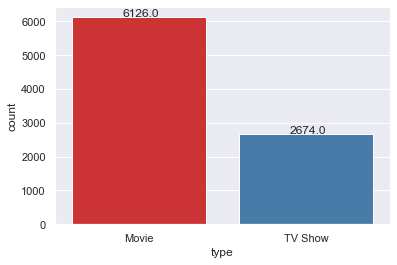

In [8]:
#plt.figure(figsize=(5,6))
sns.set(style='darkgrid')
ax=sns.countplot(data=df,x='type',palette='Set1')
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+5))

**After we know that movies are the most watched, let's now see what country releases the most movies**

Text(0.5, 1.0, 'Top 15 Countries on the basis of Content Creation')

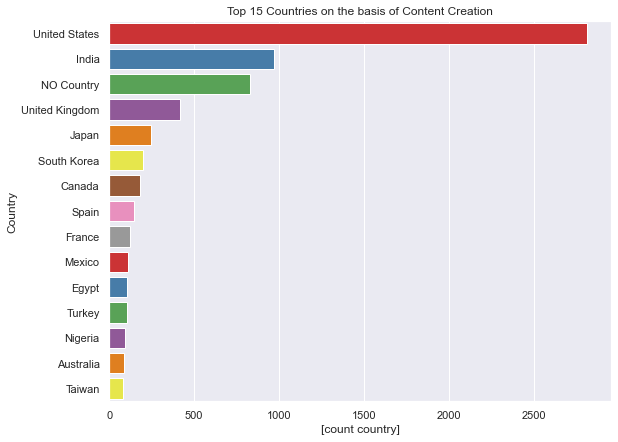

In [9]:
sns.set(style='darkgrid')
plt.figure(figsize=(9,7))
C=df['country'].value_counts().sort_values(ascending=False).index[0:15]
sns.countplot(data=df,y='country',order=C,palette='Set1')
plt.xlabel('[count country]')
plt.ylabel('Country')
plt.title("Top 15 Countries on the basis of Content Creation")

#### After we knew that the country that manufactures the most films is the **United States**, after India, but by a large difference

In [10]:
topcountries=pd.DataFrame(df['country'].value_counts().sort_values(ascending=False)[0:3])
topcountries

,country
United States,2815
India,972
NO Country,830


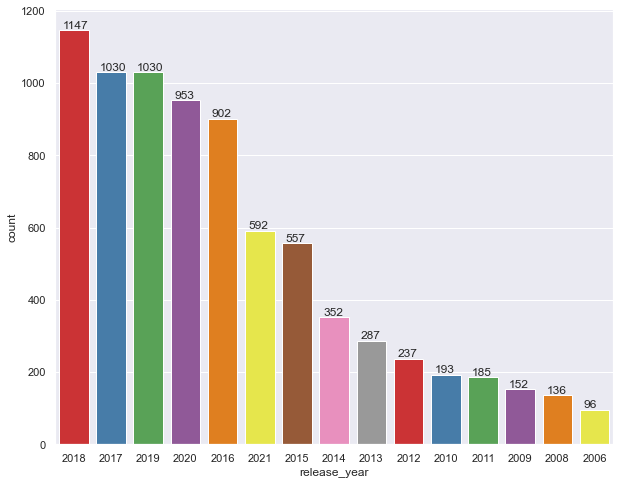

In [11]:
plt.figure(figsize=(10,8))
Year=df['release_year'].value_counts().sort_values(ascending=False).index[0:15]
ax=sns.countplot(data=df,x='release_year',order=Year,palette='Set1')
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+0.1,i.get_height()+5))

#                              -> movie analysis
> In 2018 Most number of shows and movies were added! But whats the movie duration average?


In [12]:
movie = df[df['type']=='Movie']
movie.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NO Cast,United States,2020,PG-13,90 min,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NO Country,2021,PG,91 min,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [13]:
movie['duration']=movie['duration'].str.replace(' min','')
movie['duration']=movie['duration'].astype(str).astype(int)


C:\Users\YN\AppData\Local\Temp/ipykernel_6868/2795497534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration']=movie['duration'].str.replace(' min','')
C:\Users\YN\AppData\Local\Temp/ipykernel_6868/2795497534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration']=movie['duration'].astype(str).astype(int)


Text(0.5, 1.0, 'Duration Average')

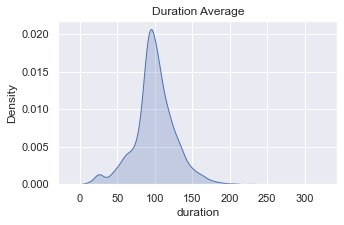

In [14]:
plt.figure(figsize=(5,3))
sns.set(style="darkgrid")
sns.kdeplot(data=movie['duration'],shade=True)
plt.title("Duration Average")

> **So, the average is 90-100 minutes. We need to find the most common genre in our data set but we don't have genre specifically in our data. We need to write a function for that.**

In [16]:
from collections import Counter

genres=movie['listed_in'].values
gen=[]
for i in genres:
    x=i.split(',')
    for t in x:
        gen.append(t.replace(' ',""))
#Alano Jin is not made up of movie genres
g=Counter(gen)
g={k: v for k,v in sorted(g.items(),key=lambda x : x[1],reverse=True)}
storeCountOfGenre=g.copy()
g

{'InternationalMovies': 2752,
 'Dramas': 2426,
 'Comedies': 1674,
 'Documentaries': 869,
 'Action&Adventure': 859,
 'IndependentMovies': 756,
 'Children&FamilyMovies': 641,
 'RomanticMovies': 616,
 'Thrillers': 577,
 'Music&Musicals': 375,
 'HorrorMovies': 357,
 'Stand-UpComedy': 343,
 'Sci-Fi&Fantasy': 243,
 'SportsMovies': 219,
 'ClassicMovies': 116,
 'LGBTQMovies': 102,
 'AnimeFeatures': 71,
 'CultMovies': 71,
 'Faith&Spirituality': 65,
 'Movies': 53}

C:\Users\YN\AppData\Local\Temp/ipykernel_6868/3177238453.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90)


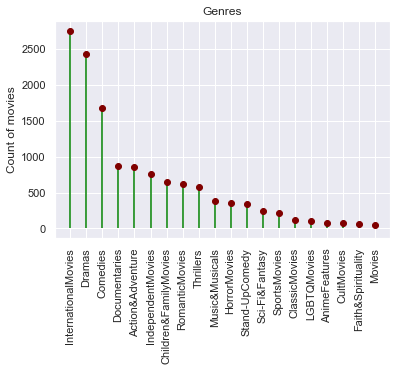

<Figure size 720x720 with 0 Axes>

In [17]:
fig, ax = plt.subplots()
fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

##### SO the most movies are international movies,but international movies are not a genre.



In [18]:
keysGenre = list(storeCountOfGenre.keys())
keysGenre = keysGenre[1:]
valuesGenre = list(storeCountOfGenre.values())
valuesGenre = valuesGenre[1:]
#In the steps above, I removed the International

Text(0.5, 1.0, 'Most watched movies')

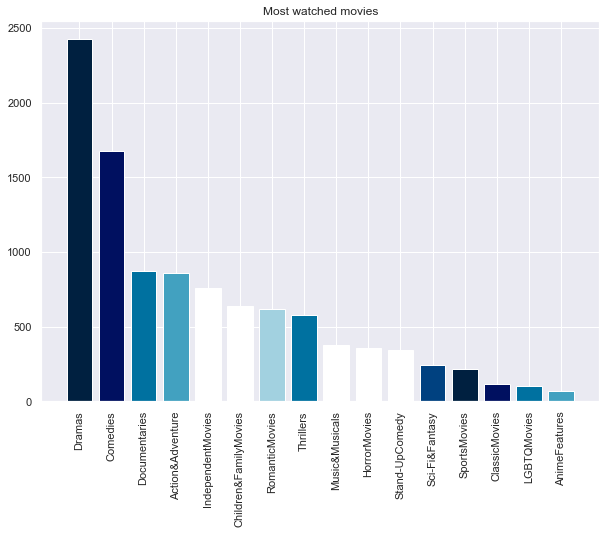

In [19]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
dataColorGenre = [2, 3, 5, 6, 8, 12, 7, 5,9,11,10,4]
my_cmap = cm.get_cmap('ocean')
my_norm = Normalize(vmin=0, vmax=8)
plt.figure(figsize=(10,7))
plt.bar(keysGenre[:-3], valuesGenre[:-3], color=my_cmap(my_norm(dataColorGenre)))
plt.xticks(rotation=90)
plt.title("Most watched movies")

#### Clearly, drama is the most common genre in Netflix. We will try to find the director's name with most movies.


<AxesSubplot:title={'center':'Directors with Most movies'}, xlabel='count', ylabel='director'>

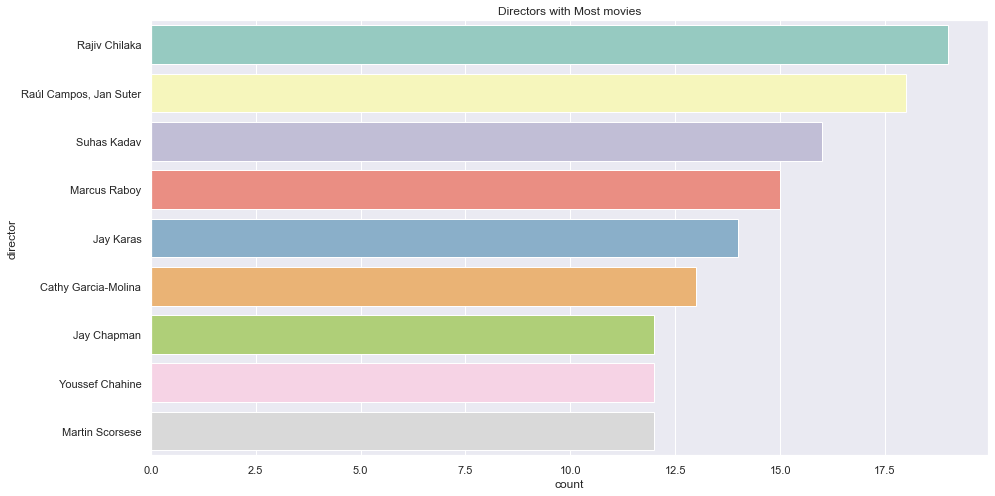

In [22]:
plt.figure(figsize=(15,8))
plt.title('Directors with Most movies')
x=movie['director'].value_counts().sort_values(ascending=False).index[1:10]
sns.countplot(y='director',data=movie,order=x,palette='Set3')

In [23]:
df[['title','cast']].head()

,title,cast
0,Dick Johnson Is Dead,NO Cast
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,NO Cast
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [24]:
movie.drop(movie[movie['cast']=='NO Cast'].index,inplace=True)

C:\Users\YN\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({col:np.repeat(df[col].values, lens) for col in idx_cols}, index=idx).assign(**{col:np.concatenate(df.loc[lens>0, col].values)for col in lst_cols}))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [26]:
cast_df_filtered = cast_df[cast_df.country.str.contains('United States', case=False)]
grouped_cast =cast_df_filtered.groupby('cast').count().show_id.sort_values(ascending=False)[:11]
grouped_cast

NameError: name 'cast_df' is not defined

In [27]:
ast_df = movie.copy()
cast_df = movie.dropna(axis=0, how='any', subset=['cast'])
cast_df['cast'] = cast_df.cast.str.split(',')
cast_df = explode(cast_df, ['cast']) #new dataframe with new rows added for each country
cast_df[['title', 'cast']].head()

,title,cast
0,My Little Pony: A New Generation,Vanessa Hudgens
1,My Little Pony: A New Generation,Kimiko Glenn
2,My Little Pony: A New Generation,James Marsden
3,My Little Pony: A New Generation,Sofia Carson
4,My Little Pony: A New Generation,Liza Koshy


In [28]:
cast_df_filtered = cast_df[cast_df.country.str.contains('United States', case=False)]
grouped_cast =cast_df_filtered.groupby('cast').count().show_id.sort_values(ascending=False)[:11]
grouped_cast

cast
Adam Sandler          20
 Molly Shannon        14
 Alfred Molina        14
 Samuel L. Jackson    13
 Fred Tatasciore      13
Nicolas Cage          13
 Fred Armisen         12
 Ray Liotta           12
 Maya Rudolph         12
 Rob Riggle           12
 Michael Peña         12
Name: show_id, dtype: int64

(10.0, 21.0)

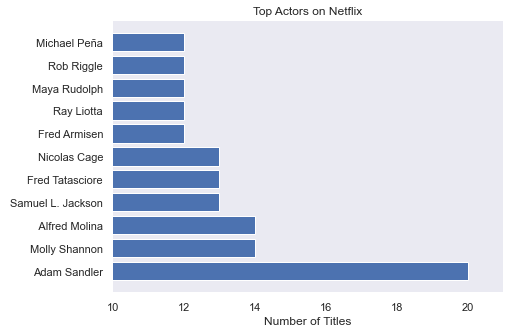

In [29]:
fig, ax = plt.subplots(figsize=(7,5))

ax.barh(grouped_cast.index, grouped_cast)
ax.grid(False)
ax.spines['right'].set_visible(False) #remove spines to minimize chartjunk
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Top Actors on Netflix')
ax.set_xlabel('Number of Titles')
ax.set_xlim(left=10) #start x-axis at 10


## Adam Sandller is the top actor on Netflix.
#### What is the most ratings for the shows?



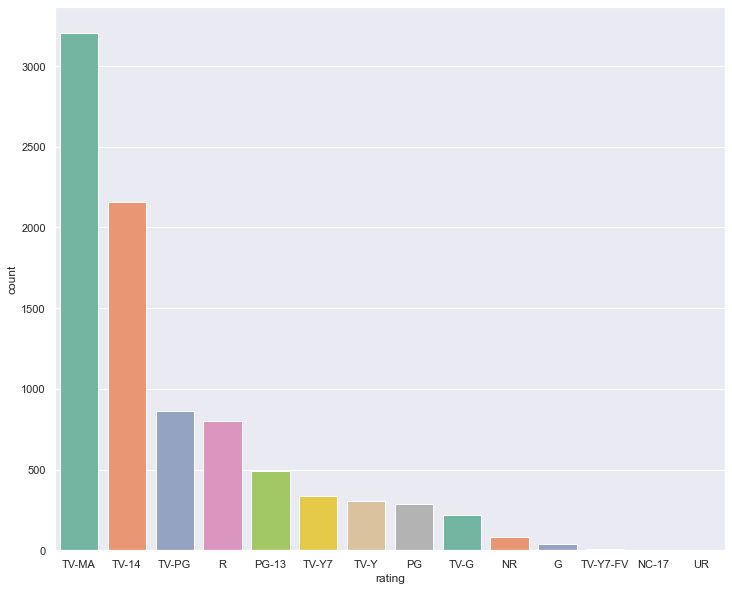

In [30]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])

### The largest count of movies are made with the 'TV-MA' rating."

##### But which actor was cast more number of shows?

In [31]:
castPerMovie=[]
totalCast = []
set1 = set()
for i in movie['cast']:
    if(type(i)==str):
        s = i.split(',')
        for j in s:
            totalCast.append(j.strip())
storeCounts=Counter(totalCast)
sorted_d={k: v for k,v in sorted(storeCounts.items(),key=lambda x : x[1],reverse=True)}


In [32]:
import operator
import itertools
finalSortedList = dict(itertools.islice(sorted_d.items(),20))
keys = finalSortedList.keys()
values = finalSortedList.values()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

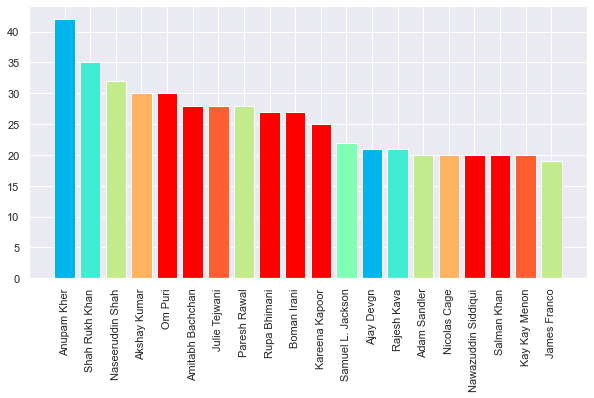

In [33]:
plt.figure(figsize=(10,5))

dataColorDirector = [2, 3, 5, 6, 8, 12, 7, 5,9,11,10,4]
my_cmap = cm.get_cmap('rainbow')
my_norm = Normalize(vmin=0, vmax=8)

plt.bar(keys,values,color=my_cmap(my_norm(dataColorDirector)))
plt.xticks(rotation=90)

In [34]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8660,Undercover: How to Operate Behind Enemy Lines,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
7575,Nazi Concentration Camps,1945


# TV show analysis


In [35]:
sh=pd.read_csv('D:\project\Investigating Netflix Movies and Guest Stars in The Office (project)/netflix_titles.csv')
series = sh[sh['type']=='TV Show']

C:\Users\YN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Average no. of Seasons of TV Shows'}, ylabel='Density'>

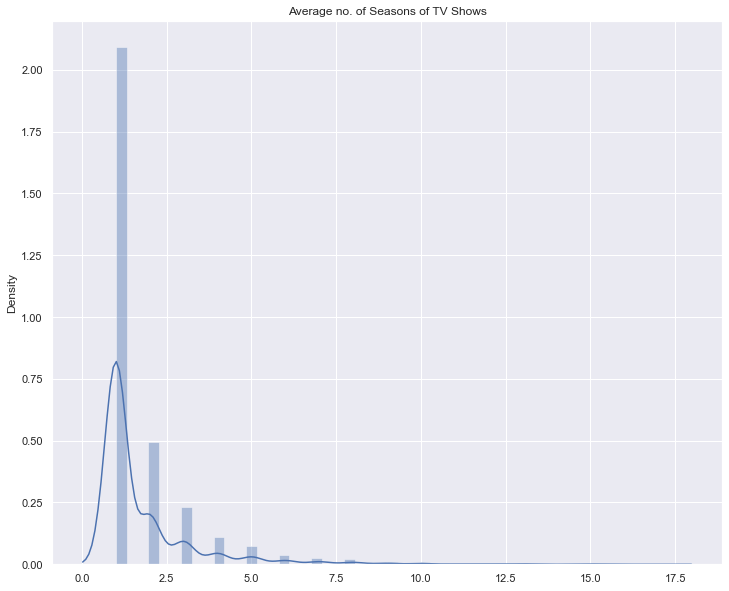

In [36]:
durationSeries = []
tvshow = series[series['duration'].notna()]
for i in tvshow['duration']:
    durationSeries.append(int(i.strip('Season')))

plt.figure(figsize=(12,10))
plt.title('Average no. of Seasons of TV Shows')
sns.distplot(durationSeries) #number of seasons

#### Most of the TV Shows in Netflix have 1 Season


In [43]:
genrePerShow=[]
totalGenreShow = []

for i in series['listed_in']:
    if(type(i)==str):
        g = i.split(',')
        for genre in g:
            totalGenreShow.append(genre.strip())

In [45]:
storeCountOfShowGenre =Counter(totalGenreShow)
finalSortedListOfShowGenre ={k: v for k,v in sorted(storeCountOfShowGenre.items(),key=lambda x : x[1],reverse=True)}
finalSortedListOfShowGenre

{'International TV Shows': 1351,
 'TV Dramas': 763,
 'TV Comedies': 581,
 'Crime TV Shows': 470,
 "Kids' TV": 451,
 'Docuseries': 395,
 'Romantic TV Shows': 370,
 'Reality TV': 255,
 'British TV Shows': 253,
 'Anime Series': 176,
 'Spanish-Language TV Shows': 174,
 'TV Action & Adventure': 168,
 'Korean TV Shows': 151,
 'TV Mysteries': 98,
 'Science & Nature TV': 92,
 'TV Sci-Fi & Fantasy': 84,
 'TV Horror': 75,
 'Teen TV Shows': 69,
 'TV Thrillers': 57,
 'Stand-Up Comedy & Talk Shows': 56,
 'Classic & Cult TV': 28,
 'TV Shows': 16}

In [46]:
keysShowGenre = list(finalSortedListOfShowGenre.keys())
keysShowGenre = keysShowGenre[1:]

valuesShowGenre = list(finalSortedListOfShowGenre.values())
valuesShowGenre = valuesShowGenre[1:]

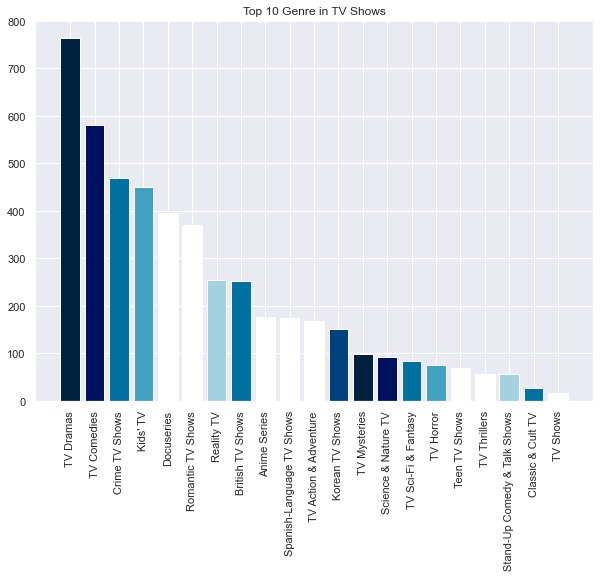

In [47]:
dataColorGenre = [2, 3, 5, 6, 8, 12, 7, 5,9,11,10,4]
my_cmap = cm.get_cmap('ocean')
my_norm = Normalize(vmin=0, vmax=8)

plt.figure(figsize=(10,7))
plt.bar(keysShowGenre, valuesShowGenre, color=my_cmap(my_norm(dataColorGenre)))
plt.title("Top 10 Genre in TV Shows")
plt.xticks(rotation=90)
plt.show()

### Newest tv shows:



In [48]:
newest_us_series=df.sort_values(by='release_year', ascending=False)[0:5]
newest_us_series

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in
1155,s1156,Movie,Marked,Nadine Ibrahim,NO Cast,Nigeria,2021,TV-PG,21 min,"Documentaries, International Movies"
459,s460,TV Show,Never Have I Ever,No Director,"Maitreyi Ramakrishnan, Poorna Jagannathan, Ric...",United States,2021,TV-14,2 Seasons,"TV Comedies, TV Dramas, Teen TV Shows"
483,s484,Movie,Last Summer,No Director,"Fatih Şahin, Ece Çeşmioğlu, Halit Özgür Sarı, ...",NO Country,2021,TV-MA,102 min,"Dramas, International Movies, Romantic Movies"
484,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,Lee Su-geun,NO Country,2021,TV-G,46 min,Stand-Up Comedy
485,s486,Movie,Lethal Love,Avi Federgreen,"David Pinard, Joelle Farrow, Torri Higginson, ...",NO Country,2021,TV-14,89 min,Thrillers


## Conclusions
We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:
* The most content type on Netflix is movies,
* The country by the amount of the produces content is the United States,
* Drama is the most common genre in Netflix
* Most of the tv drama is season 1.
* Anupum Kher is the most common actor
* Rajiv Ghiv Ghilkak and Raul Campos and Jan Suter has directed Most Number of Movies.